<a href="https://colab.research.google.com/github/KeremAydin98/tensorflow-documentation/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

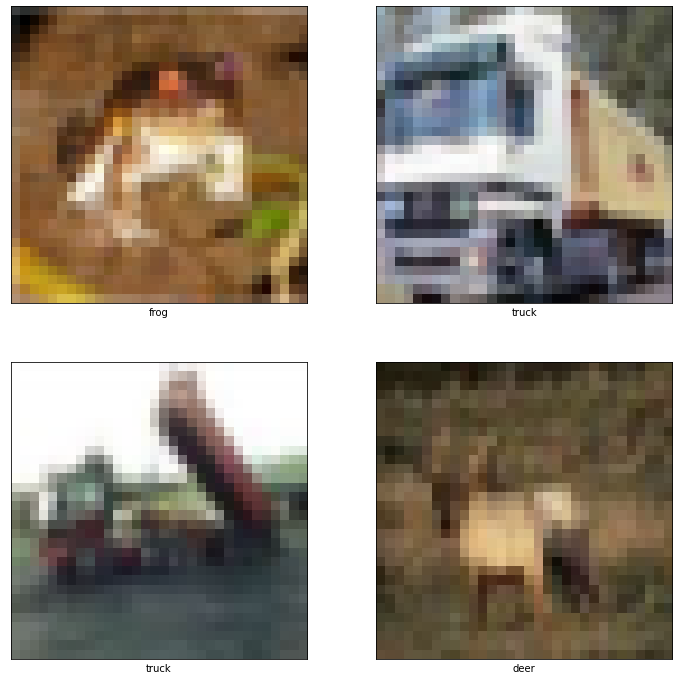

In [ ]:
plt.figure(figsize=(12,12))
for i in range(4):

  plt.subplot(2,2,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[int(y_train[i])])

plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, input_shape=(32,32,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 64)        

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5762 - accuracy: 0.4240 - val_loss: 1.3298 - val_accuracy: 0.5259
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2006 - accuracy: 0.5713 - val_loss: 1.2091 - val_accuracy: 0.5668
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0495 - accuracy: 0.6286 - val_loss: 1.0247 - val_accuracy: 0.6387
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9586 - accuracy: 0.6612 - val_loss: 1.0040 - val_accuracy: 0.6513
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8953 - accuracy: 0.6852 - val_loss: 0.9409 - val_accuracy: 0.6747
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8338 - accuracy: 0.7071 - val_loss: 0.8973 - val_accuracy: 0.6918
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7853 - accuracy: 0.7249 - val_loss: 0.9090 - val_ac

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9537 - accuracy: 0.7070


[0.9537105560302734, 0.7070000171661377]

1/1 [==============================] - 0s 15ms/step


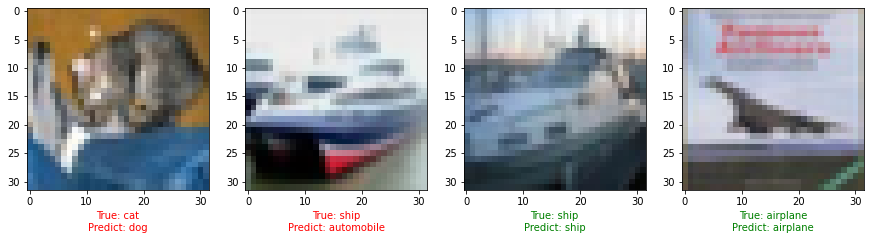

In [ ]:
import numpy as np

fig, ax = plt.subplots(1, 4, figsize=(15, 15))

for i in range(4):

  pred = model.predict(np.expand_dims(x_test[i], 0))
  
  prediction = class_names[int(np.argmax(pred, -1))]

  if prediction == class_names[int(y_test[i])]:

    color = "green"

  else:

    color = "red"

  ax[i].imshow(x_test[i])
  ax[i].set_xlabel("True: {0}\nPredict: {1}".format(str(class_names[int(y_test[i])]), str(prediction)))
  ax[i].xaxis.label.set_color(color)

plt.show()


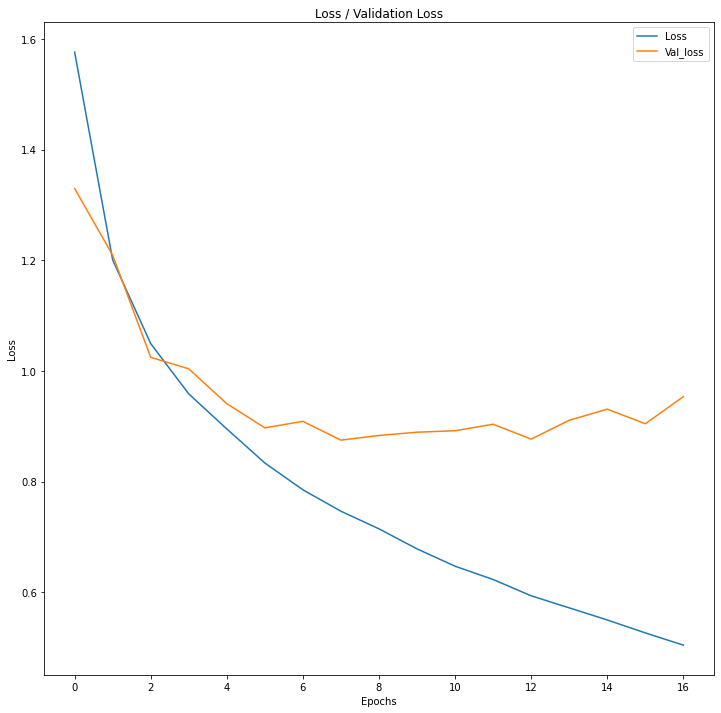

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(17),history.history["loss"], label="Loss")
plt.plot(range(17),history.history["val_loss"], label="Val_loss")
plt.legend()
plt.title("Loss / Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

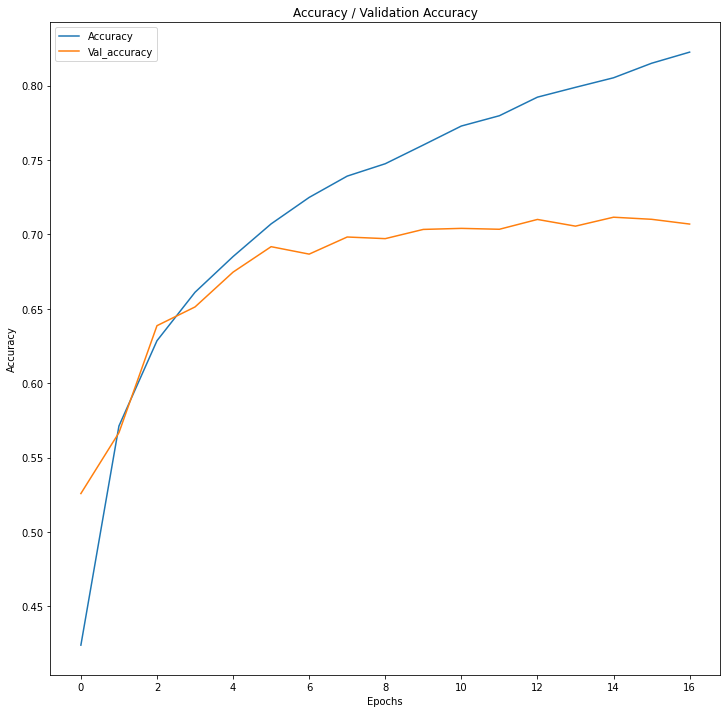

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(17),history.history["accuracy"], label="Accuracy")
plt.plot(range(17),history.history["val_accuracy"], label="Val_accuracy")
plt.legend()
plt.title("Accuracy / Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()